<h1>importing libraries</h1>

In [3]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import  StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

<h1>Data Acquistion</h1>

In [4]:
df=pd.read_csv("gld_price_data.csv")

In [5]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


<h2>data Exploration</h2>

In [6]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
#checking missing value
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
df.shape

(2290, 6)

<h2>
    correlation checking
</h2>

In [11]:
df1=df.iloc[:,2:]

In [12]:
 correlation=df1.corr()

<Axes: >

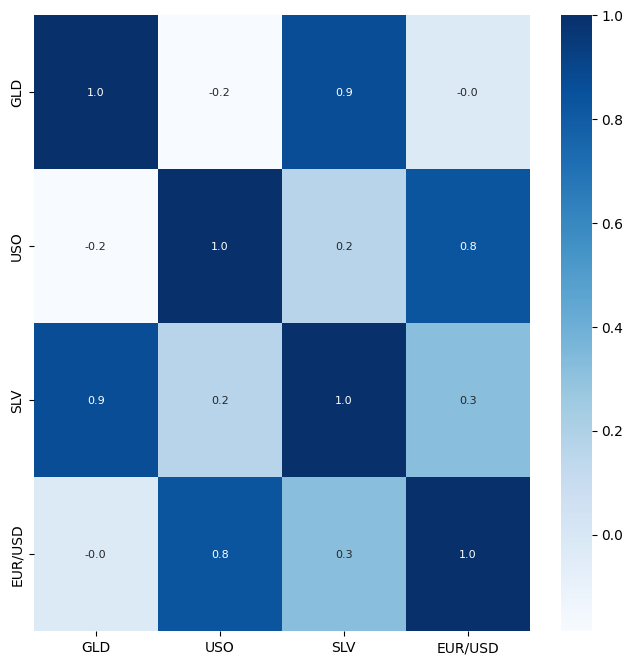

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap="Blues")


<h1>corellation of gold</h1>

In [14]:
print(correlation 
      ["GLD"])

GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [15]:
#CHECKING DISTRIBUTION

C:\Users\Hp\AppData\Local\Temp\ipykernel_7892\3844802524.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"],color="green")


<Axes: xlabel='GLD', ylabel='Density'>

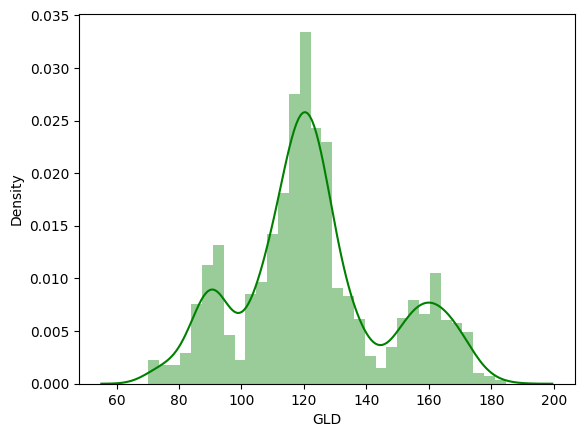

In [16]:
sns.distplot(df["GLD"],color="green")

<h1>OUTLIER DETECTION USING IQR</h1>

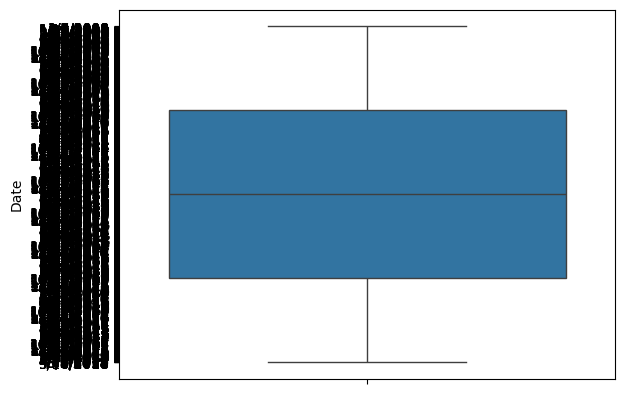

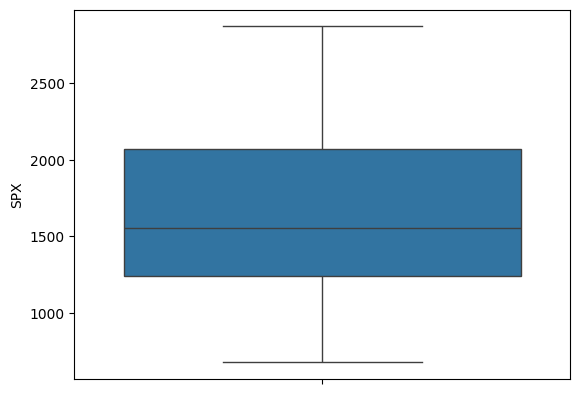

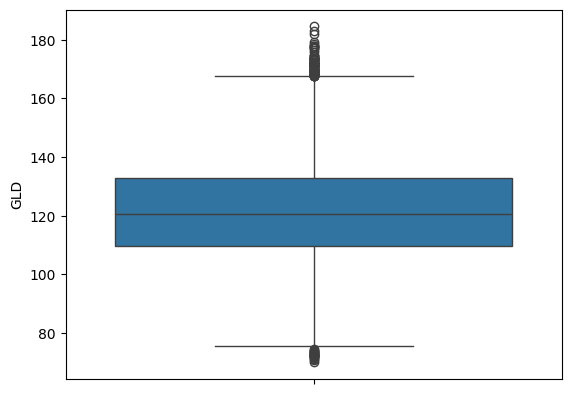

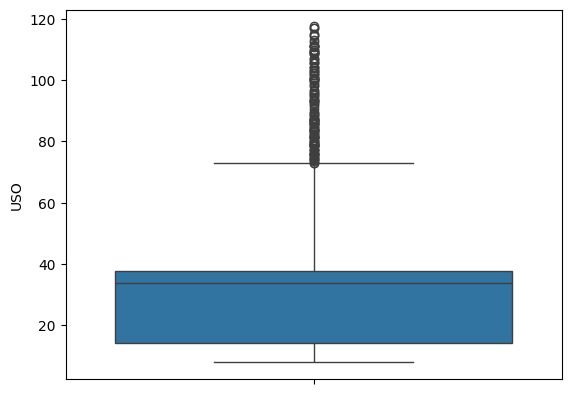

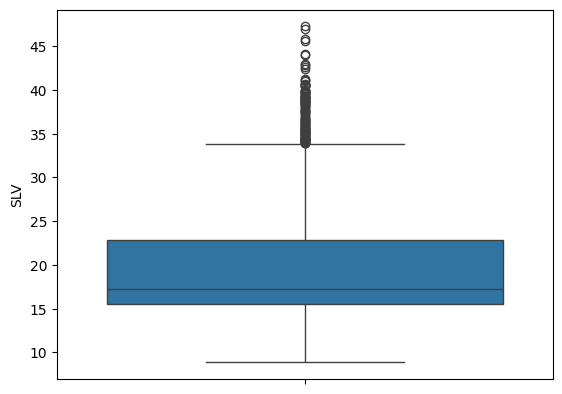

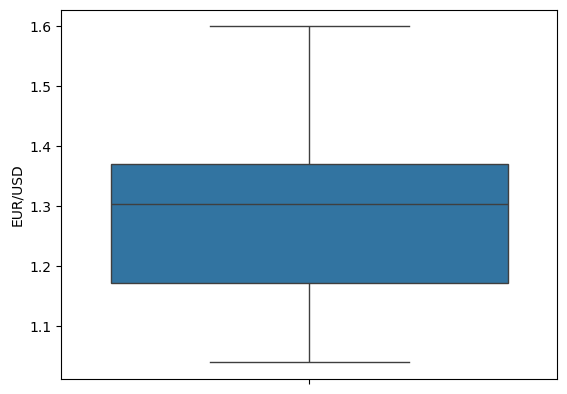

In [17]:
 for i in df:
     sns.boxplot(df[i])
     plt.show()

<H1>OUTLIERS IN GOLD COLUMN</H1>

In [18]:
percentile_75=df["GLD"].quantile(0.75)
percentile_25=df["GLD"].quantile(0.25)


In [19]:
percentile_75

132.84000400000002

In [20]:

iqr=percentile_75-percentile_25
iqr

23.115003750000028

In [21]:

upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25-1.5*iqr
upper_limit

167.51250962500006

In [22]:
df[df["GLD"]>upper_limit]

,Date,SPX,GLD,USO,SLV,EUR/USD
788,8/9/2011,1172.530029,168.610001,31.620001,36.320000,1.438311
789,8/10/2011,1120.760010,174.580002,31.780001,38.439999,1.412469
790,8/11/2011,1172.640015,170.750000,33.299999,37.799999,1.422637
791,8/15/2011,1204.489990,171.800003,34.220001,38.669998,1.443835
792,8/16/2011,1192.760010,173.919998,33.830002,39.029999,1.439802
...,...,...,...,...,...,...
1068,11/19/2012,1386.890015,167.869995,32.669998,32.049999,1.275950
1070,11/21/2012,1391.030029,167.559998,32.119999,32.290001,1.281443
1071,11/23/2012,1409.150024,169.610001,32.320000,32.980000,1.287515
1072,11/26/2012,1406.290039,169.429993,32.189999,33.020000,1.296596


In [23]:
df[df["GLD"]<lower_limit]

,Date,SPX,GLD,USO,SLV,EUR/USD
137,9/10/2008,1232.040039,74.220001,82.970001,10.60,1.399600
138,9/11/2008,1249.050049,73.080002,81.489998,10.32,1.423994
161,10/22/2008,896.780029,71.709999,54.930000,9.45,1.294498
162,10/23/2008,908.109985,70.650002,56.599998,9.38,1.262993
163,10/27/2008,848.919983,72.180000,50.849998,8.85,1.246463
164,10/28/2008,940.510010,73.790001,53.220001,9.05,1.280902
165,10/29/2008,930.090027,74.000000,55.680000,9.67,1.295924
166,10/30/2008,954.090027,72.709999,54.000000,9.68,1.286803
167,10/31/2008,968.750000,71.339996,55.590000,9.58,1.270196
168,11/3/2008,966.299988,71.099998,52.490002,9.62,1.261798


In [24]:
new_df=df[df["GLD"]<upper_limit]
new_df.shape

(2198, 6)

In [30]:
df[df["GLD"]<lower_limit]

,Date,SPX,GLD,USO,SLV,EUR/USD


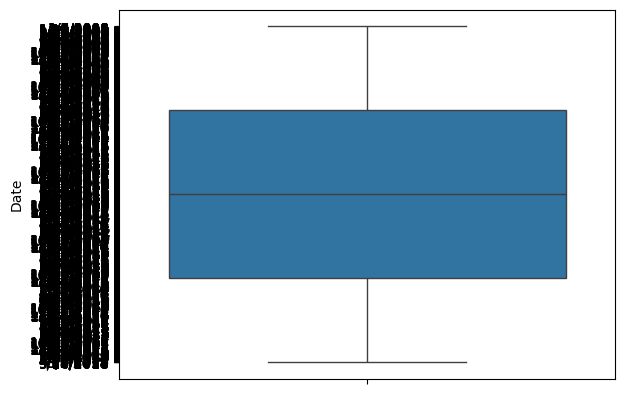

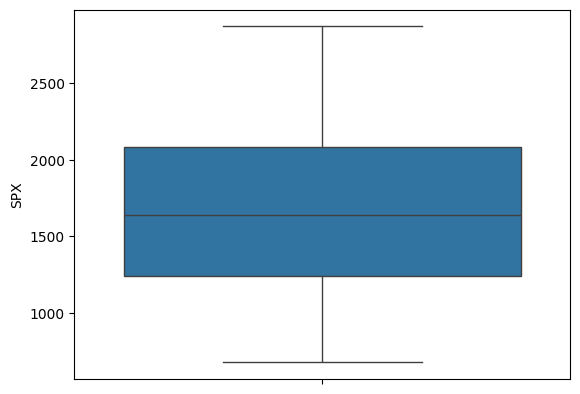

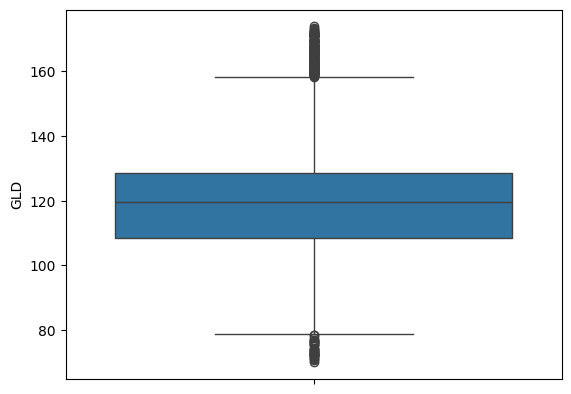

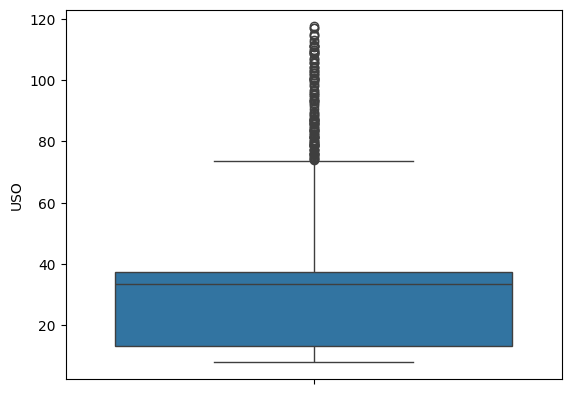

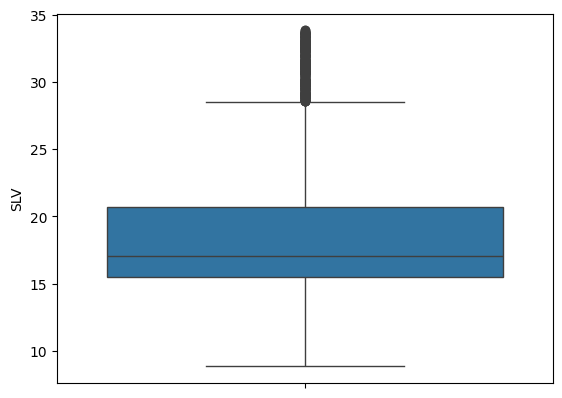

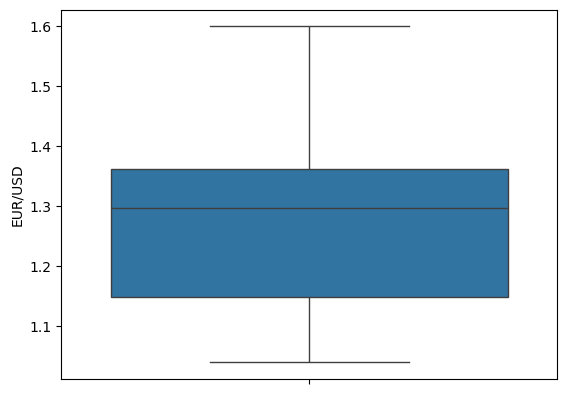

In [32]:
for i in new_df:
     sns.boxplot(new_df[i])
     plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7892\3828559799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"])


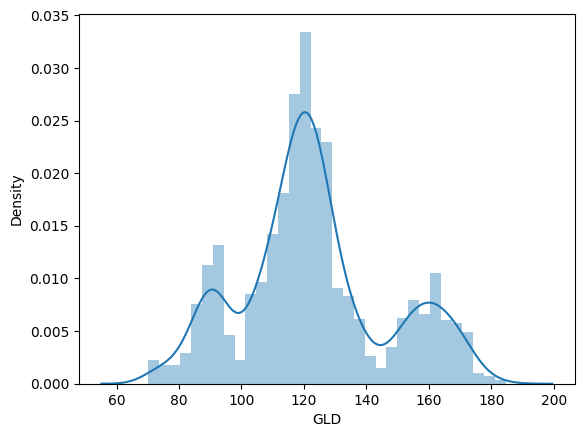

In [33]:
sns.distplot(df["GLD"])
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_7892\3474925547.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df["GLD"])


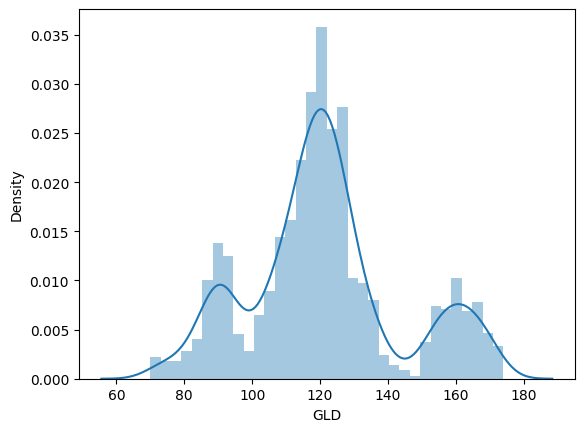

In [34]:
sns.distplot(new_df["GLD"])
plt.show()

In [35]:
#sipltting the data


In [36]:
X=new_df.drop(columns=["GLD","Date"],axis=1)
y=new_df["GLD"]


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [38]:
X_train.shape

(1738, 4)

In [39]:
X_test.shape

(435, 4)

In [40]:
reg=RandomForestRegressor()

In [41]:
reg.fit(X_train,y_train)

RandomForestRegressor()

model evaluation

In [42]:
y_pred=reg.predict(X_test)

<H1>Checking metrices</H1>

In [43]:
r2_score(y_test,y_pred)

0.9927724202385314

In [45]:
mean_absolute_error(y_test,y_pred)

1.1796862114712636

In [46]:
mean_squared_error(y_test,y_pred)

3.501215441000571